<a href="https://colab.research.google.com/github/RamziRBM/lab-text-generation-shakespeare/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab | Text Generation from Shakespeare's Sonnet

This notebook explores the fascinating domain of text generation using a deep learning model trained on Shakespeare's sonnets.

The objective is to create a neural network capable of generating text sequences that mimic the style and language of Shakespeare.

By utilizing a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers, this project aims to demonstrate how a model can learn and replicate the complex patterns of early modern English.

The dataset used consists of Shakespeare's sonnets, which are preprocessed and tokenized to serve as input for the model.

Throughout this notebook, you will see the steps taken to prepare the data, build and train the model, and evaluate its performance in generating text.

This lab provides a hands-on approach to understanding the intricacies of natural language processing (NLP) and the potential of machine learning in creative text generation.

Let's import necessary libraries

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import re
from string import punctuation


Let's get the data!

In [3]:
import requests
url = 'https://raw.githubusercontent.com/martin-gorner/tensorflow-rnn-shakespeare/master/shakespeare/sonnets.txt'
resp = requests.get(url)
with open('sonnets.txt', 'wb') as f:
    f.write(resp.content)

data = open('sonnets.txt').read()
"""
data = re.sub(r"FROM fairest", "From fairest", data)
data = re.sub(r"[A-Z]+\.", "", data)
data = re.sub(r"[A-Z][A-Z\-]+\s", "", data)
data = re.sub(f"[{re.escape(punctuation)}]", "", data)
data = re.sub(r"\n\s*\n", "\n", data)
data = re.sub(r"^\s*\n", "", data)
data = re.sub(r"\s*\n", "\n", data)
print (data)
"""
corpus = data.lower().split("\n")


<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1429276763.py:10: SyntaxWarning: invalid escape sequence '\.'
  data = re.sub(r"[A-Z]+\.", "", data)


Step 1: Initialise a tokenizer and fit it on the corpus variable using .fit_on_texts

In [4]:
# Your code here :
_tokenizer = Tokenizer(num_words=5000)
_tokenizer.fit_on_texts(corpus)


Step 2: Calculate the Vocabulary Size

Let's figure out how many unique words are in your corpus. This will be the size of your vocabulary.

Calculate the length of tokenizer.word_index, add 1 to it and store it in a variable called total_words.

In [9]:
# Your code here :
total_words = len(_tokenizer.word_index) + 1
total_words

3375

Create an empty list called input_sequences.

For each sentence in your corpus, convert the text into a sequence of integers using the tokenizer.
Then, generate n-gram sequences from these tokens.

Store the result in the list input_sequences.

In [5]:
# Your code here :
Labels = []
input_sequences = []
for line in corpus:
    token_list = _tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

Labels

[]

Calculate the length of the longest sequence in input_sequences. Assign the result to a variable called max_sequence_len.

Now pad the sequences using pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre').
Convert it to a numpy array and assign the result back to our variable called input_sequences.

In [6]:
# Your code here :
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(max_sequence_len)
input_sequences

11


array([[   0,    0,    0, ...,    0,    3,    2],
       [   0,    0,    0, ...,    3,    2,  313],
       [   0,    0,    0, ...,    2,  313, 1375],
       ...,
       [   0,    0,    0, ...,  493,  493, 3374],
       [   0,    0,    0, ...,  493, 3374,   14],
       [   0,    0,    0, ..., 3374,   14,   15]], dtype=int32)

Prepare Predictors and Labels

Split the sequences into two parts:

- Predictors: All elements from input_sequences except the last one.
- Labels: The last element of each sequence in input_sequences.

In [7]:
# Your code here :
Predictors, Labels = input_sequences[:,:-1],input_sequences[:,-1]

One-Hot Encode the Labels :

Convert the labels (which are integers) into one-hot encoded vectors.

Ensure the length of these vectors matches the total number of unique words in your vocabulary.

Use ku.to_categorical() on labels with num_classes = total_words

Assign the result back to our variable labels.

In [10]:
# Your code here :
Labels = ku.to_categorical(Labels, num_classes=total_words)
Labels.shape

(15484, 3375)

# Initialize the Model

Start by creating a Sequential model.

Add Layers to the Model:

Embedding Layer: The first layer is an embedding layer. It converts word indices into dense vectors of fixed size (100 in this case). Set the input length to the maximum sequence length minus one, which corresponds to the number of previous words the model will consider when predicting the next word.

Bidirectional LSTM Layer: Add a Bidirectional LSTM layer with 150 units. This layer allows the model to learn context from both directions (past and future) in the sequence. return_sequences=True

Dropout Layer: Add a dropout layer with a rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to 0 during training.

LSTM Layer: Add a second LSTM layer with 100 units. This layer processes the sequence and passes its output to the next layer.

Dense Layer (Intermediate): Add a dense layer with half the total number of words as units, using ReLU activation. A regularization term (L2) is added to prevent overfitting.

Dense Layer (Output): The final dense layer has as many units as there are words in the vocabulary, with a softmax activation function to output a probability distribution over all words.

In [11]:
model = Sequential([
    # Your code here :
    layers.Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1),
    layers.Bidirectional(LSTM(150, return_sequences=True)),
    layers.Dropout(0.2),
    #layers.Bidirectional(LSTM(100)),
    layers.LSTM(100),
    layers.Dense(total_words//2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(total_words, activation="softmax"),

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compile the Model:

Compile the model using categorical crossentropy as the loss function, the Adam optimizer for efficient training, and accuracy as the metric to evaluate during training.

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_sequence_len-1))

# Print Model Summary:

Use model.summary() to print a summary of the model, which shows the layers, their output shapes, and the number of parameters.

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 100)        │       337,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 10, 300)        │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1687)           │       170,387 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3375)           │     5,697,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,666,487 (25.43 MB)

 Trainable params: 6,666,487 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

# Now train the model for 50 epochs and assign it to a variable called history.

Training the model with 50 epochs should get you around 40% accuracy.

You can train the model for as many epochs as you like depending on the time and computing constraints you are facing. Ideally train it for a larger amount of epochs than 50.

That way you will get better text generation at the end.

However, dont waste your time.

In [14]:
# Train the model
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Predictors, Labels, test_size=0.2)

In [15]:
print(Predictors.shape)

history = model.fit(Xtrain, Ytrain, epochs=150, verbose=1, validation_split=0.1)

(15484, 10)
Epoch 1/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0189 - loss: 7.4695 - val_accuracy: 0.0202 - val_loss: 6.7101
Epoch 2/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0260 - loss: 6.4501 - val_accuracy: 0.0202 - val_loss: 6.8163
Epoch 3/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0228 - loss: 6.3532 - val_accuracy: 0.0234 - val_loss: 6.9322
Epoch 4/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0235 - loss: 6.2765 - val_accuracy: 0.0194 - val_loss: 7.0269
Epoch 5/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0295 - loss: 6.1799 - val_accuracy: 0.0202 - val_loss: 7.1426
Epoch 6/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0344 - loss: 6.0693 - val_accuracy: 0.0258 - val_loss: 7.1650
Epoch 7/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0379 - loss: 5.9947 - val_accuracy: 0.0299 - val_loss: 7.3962
Epoch 8/150
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0422 - lo

# Use plt from matplotlib to plot the training accuracy over epochs and the loss over epochs

First you will have to get the accuracy and loss data over epochs, you can do this by using methods on your model.

====  2nd model  =====


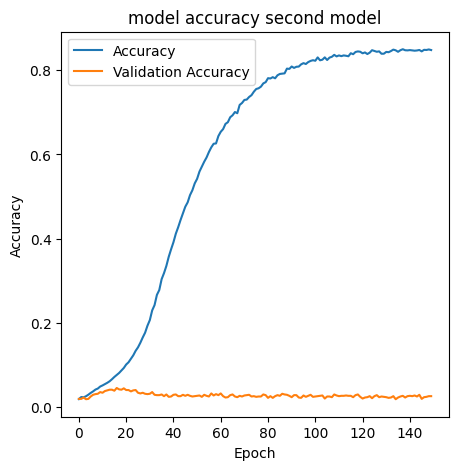

In [17]:
import matplotlib.pyplot as plt

def plot_accuracy(history, descr):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(5, 5))
  plt.plot(acc)
  plt.plot(val_acc)
  #plt.plot(loss)
 # plt.plot(val_loss)
  plt.title("model accuracy "+descr)
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
  plt.show()

#plot_accuracy(history, "first model")
print("====  2nd model  =====")
plot_accuracy(history, "second model")

# Generate text with the model based on a seed text

Now you will create two variables :

- seed_text = 'Write the text you want the model to use as a starting point to generate the next words'
- next_words = number_of_words_you_want_the_model_to_generate

Please change number_of_words_you_want_the_model_to_generate by an actual integer.

In [18]:
# Your code here :# Your code here :
seed_txt = 'To be, or not to be, that'
next_words = 100 # You can change this number to generate more or less words



```
# This is formatted as code
```

Now create a loop that runs based on the next_words variable and generates new text based on your seed_text input string. Print the full text with the generated text at the end.

This time you dont get detailed instructions.

Have fun!

In [19]:
def generate_sonnets(seed_text):
  for _ in range(next_words):
    # Convert seed text to sequence
    token_list = _tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

    # ✅ Extract the last predicted word
    predicted_index = predicted[0]

    # Find the word corresponding to the predicted index
    output_word = ""
    for word, index in _tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    # Append it to the sentence
    seed_text += " " + output_word
  return seed_text

print(generate_sonnets(seed_txt))

To be, or not to be, that it stay of good sight cross rare men look you made must three chest lie affords depend cross cross cross stand back to me true true friend so true well knows eyes men's blot friend true well friend do me be shown love mine eyes see thee more true being back again defaced yet her end must have men's due of thy sight cross grow groan did lie to his stars living treasure i true deeds friend in me be thee shown but me alone made to true glory so 'no ' friend to me was love love love so


Experiment with at least 3 different seed_text strings and see what happens!

In [20]:
print(generate_sonnets("what I would improvise"))

what I would improvise see the seemly raiment of thy days must rehearse rehearse find to flow delight sight wit true true bright back more more more more re did new minutes store doth stand in thy woe ' friend words ' heir ' lips grief decay was taste ' bad still decay good skill hide them well so brought fitted stand in thy hand are rehearse deem'd grow treasure the sum of his moan did hate did other part are day things things had dead date 'will' pleasure owe despair her rage are wretched more are bright sight than thee hate alone brain


In [21]:
print(generate_sonnets("Romeo was a "))

Romeo was a  babe hath but love's virtue more eyed ' friend to thee true true praise thee call taste was me dead fire bring do thy breast still put my life to his legacy sheds flattery in thee show thee friend me swear fast made joy mine own praise still seem thy hair still decay worse still state was her pace keep is me poor mask'd thou so my heart when thee other kiss thee shown despise shown wrong ' friend in his son back eye so true well form alone more ground growing life was decays made hearts is day are


In [22]:
# Your code here :
print(generate_sonnets("Julliette was a "))

Julliette was a  babe hath but love's virtue more eyed ' friend to thee true true praise thee call taste was me dead fire bring do thy breast still put my life to his legacy sheds flattery in thee show thee friend me swear fast made joy mine own praise still seem thy hair still decay worse still state was her pace keep is me poor mask'd thou so my heart when thee other kiss thee shown despise shown wrong ' friend in his son back eye so true well form alone more ground growing life was decays made hearts is day are


In [23]:
print(generate_sonnets("Romeo used to be "))

Romeo used to be  error and with him our appetites than thee alone than untrue love conscience is bears the same friend yet mine eye so cover thou blind life still true true friend so i so see thou blind mind being pride from thee you live untold live none true glory be level in thee true true true true tongue must sweetly stay of all hearts dead treasure a cheer must be taste ' nor to rehearse rare bear thee dead friend that when me am the worst to your head dead treasure to show thee wealth ever me dead treasure thy show
